# 0. Imports

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Funções

In [4]:
def carrega_dados(caminho, aba, ignora_primeira_linha_coluna = False):
    if ignora_primeira_linha_coluna == True:
        dados = pd.read_excel(caminho, sheet_name = aba, skiprows = [0])
        if dados.shape[0] != 0:
            dic_mes = {'1': 'jan', '2': 'fev', '3': 'mar', '4': 'abr', '5': 'may','6': 'jun',
                   '7': 'jul', '8': 'ago', '9': 'set', '10': 'out', '11': 'nov', '12': 'dez'}
            dia = dados["Unnamed: 0"].dt.day
            mes = dados["Unnamed: 0"].dt.month
            dados["Unnamed: 0"] = dados["Unnamed: 0"].dt.day.map(str) + "/" + dados["Unnamed: 0"].dt.month.map(str).apply(lambda x: dic_mes[x])
            dados = dados.set_index("Unnamed: 0")                
    else:
        dados = pd.read_excel(caminho, sheet_name = aba)
        
    return dados


def grafico_comparativo(lista_alimentos, atributo):
    df = dados_nutricao.set_index('alimento')
    df = df.loc[lista_alimentos]
    plt.figure(figsize = (8,6))
    plt.title(f"Comparação de {atributo}")
    sns.barplot(data = df, x = df.index, y = atributo)







# 2. Base de dados

In [19]:
caminho_dados_csa = "data/csa_pindorama.xlsx"
dados_busca_cesta = carrega_dados(caminho_dados_csa, 'mutiroes', True)
dados_busca_cesta.shape


(1, 2)

# 3. Testes de gráfico comparativo

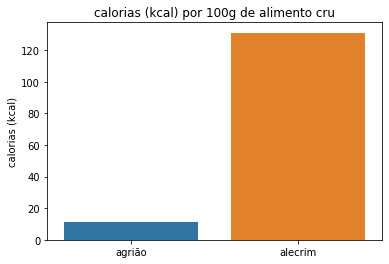

In [13]:
dados_nutricao = carrega_dados(caminho_dados_csa,'info_nutricional')
grafico_comparativo(dados_nutricao,["agrião", "alecrim"], "calorias (kcal)")

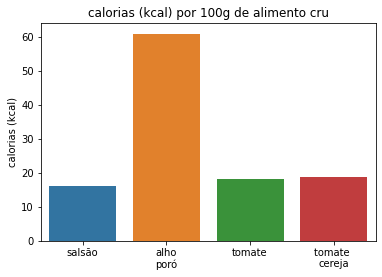

In [14]:
caminho_dados_csa = "data/csa_pindorama.xlsx"
dados_nutricao = pd.read_excel(caminho_dados_csa, engine='openpyxl',sheet_name='info_nutricional')

def grafico_comparativo(dados_nutricao, lista_alimentos, atributo):
    df = dados_nutricao.set_index('alimento')
    df = df.loc[lista_alimentos]
    
    
    #plt.figure(figsize = (8,6))
    
    figura, ax = plt.subplots()
    ax = sns.barplot(data = df, x = df.index, y = atributo)
    ax.set_title(f"{atributo} por 100g de alimento cru")
    ax.set(xlabel=None)
    
           
figura = grafico_comparativo(dados_nutricao,['salsão',dados_nutricao["alimento"].values[5], 'tomate', 'tomate \ncereja'], 'calorias (kcal)')

# 4. Planilha CSA

In [7]:
# ordenado
caminho_dados_csa = "data/csa_pindorama.xlsx"
dados_csa = pd.read_excel(caminho_dados_csa, engine='openpyxl',sheet_name='produtos')
dados_csa.head()

,produto,na_terra,na_cesta,novos
0,acerola,x,NaN,NaN
1,agrião,x,NaN,NaN
2,alecrim,x,NaN,NaN
3,alface americana,x,NaN,NaN
4,alface crespa,x,NaN,NaN


In [9]:
# ordenado
dados_csa.sort_values(by='produto')

,produto,na_terra,na_cesta,novos
0,acerola,x,NaN,NaN
1,agrião,x,NaN,NaN
2,alecrim,x,NaN,NaN
3,alface americana,x,NaN,NaN
4,alface crespa,x,NaN,NaN
...,...,...,...,...
58,rúcula,x,NaN,x
60,salsinha,x,NaN,x
59,salsão,x,NaN,NaN
61,tomate,NaN,NaN,NaN


In [10]:
df = dados_csa.copy()
df.index = [" "] * len(df)
df.loc[:,'na_terra'] = " "
df.loc[:,'na_cesta'] = " "
df.rename({'produto':'tabela','na_terra': '   ', 'na_cesta':' '}, axis='columns', inplace=True)
df[['tabela']]

,tabela
,acerola
,agrião
,alecrim
,alface americana
,alface crespa
...,...
,rúcula
,salsão
,salsinha
,tomate


# 5. Testes de manipulação de strings

In [54]:
dados_nutricao["alimento"].values[-1]

'tomate \ncereja'

In [15]:
Lst = ['You can never understand one language until you understand at least two.',
       'Language is the blood of the soul into which thoughts run and out of which they grow.']
InsertNewlines = lambda lst, n=2: '\n'.join([' '.join(lst[i:i + n]) for i in range(0, len(lst), n)]) # n=words to keep together
out = [InsertNewlines(s.split()) for s in Lst]

In [16]:
print(out)

['You can\nnever understand\none language\nuntil you\nunderstand at\nleast two.', 'Language is\nthe blood\nof the\nsoul into\nwhich thoughts\nrun and\nout of\nwhich they\ngrow.']


# 6. Testes do histórico

# 7. Melhor visualização da cesta

In [ ]:
def na_cesta_extenso(df,label):
    print("rótulo")
    for item in df
    st.markdown("**:green_salad:** <font size='6' color='blue'> Informações disponíveis até 5ª-feira </font>", unsafe_allow_html=True)
    
    

In [33]:
caminho_dados_csa = "data/csa_pindorama.xlsx"
dados_busca_cesta = carrega_dados(caminho_dados_csa, 'produtos')
na_cesta = dados_busca_cesta.query("na_cesta == 'x'")
for item in na_cesta['produto'].sort_values:
    print(item)
#na_cesta_extenso(na_cesta, "rótulo")

agrião
beterraba
brócolis
hortelã


In [37]:
na_cesta['produto'].sort_values().values

array(['agrião', 'beterraba', 'brócolis', 'hortelã'], dtype=object)

In [ ]:
 if st.checkbox(f"Na cesta em {data}",value=False):
        st.image("src/na_cesta.jpg",use_column_width=True)
        na_cesta = dados_csa.query("na_cesta == 'x'")
        if na_cesta.shape[0] == 0:
            st.markdown("**:green_salad:** <font size='6' color='blue'> Informações disponíveis até 5ª-feira </font>", unsafe_allow_html=True)
        else:
            gera_tabela(na_cesta, f'--provável cesta em {data} (sujeito à adições)--')